**Dataset**		
Fraud_data_with_country.csv 

**About **	 	 		
Dataset presents purchases from an online store.<br>
There are two types of purchases: fraud and normal. 				

**Metadata**<br>	
<br>
**transaction_id** - id of a transaction<br>
**Signup_time** - user/device signed up date and time<br>
**purchase_time** - user/device purchase date and time<br>
**Purchase_value** -  value of a specific purchase<br>
**Device_id** - unique id for each device(consider as a user_id)<br>
**Source **- purchase source: Ads, SEO, etc. <br>
**Browser** - purchase browser<br>
**sex**  - sex of a user/device<br>
**age**- age of a user/device<br>
**country** -  device country<br>
**class** -  1: fraud purchase, 0: normal purchase<br>
<br>

**Ignore user_id and ip_address columns<br>
<br>
<br>

**Business questions**
1. Which age, country, sex, browser, source are the most popular? Use bar, stacked bar, pie charts to present your results.

**2. In which months fraud purchases are most likely to happen? Use a bar chart.**

**3. In which weekdays fraud purchases are most likely to happen? Use a bar chart.**

4. Are there cases when a user/device did more than one fraud purchase in a given time range? Use text to present your results.

5. Find fraud and normal purchase distribution over time in a given time period and averaged in a given time period. Use line and bar, pie charts.

6. How many users did at least one normal purchase before a fraud purchase. Use text to present your results.

7. Is there a correlation between purchase value and class? Use scatter plot and colors.

**8. What is the average time between sign up time and purchase time? Use histograms, box plots.**

**9. Is there a correlation between purchase_value and age? Use scatter plot.**

10. Describe your insights in every step. And also have final summary where will be presented important insights in few words.
<br>
Bunus (+2 point)<br>
Do a deep dive and find at least 2 more insights


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv(r'Fraud_data_with_country.csv')

In [18]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country
0,22058,24-02-2015 22:55:49,18-04-2015 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,07-06-2015 20:39:50,08-06-2015 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,01-01-2015 18:52:44,01-01-2015 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,28-04-2015 21:13:25,04-05-2015 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,United States
4,221365,21-07-2015 07:09:52,09-09-2015 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


**Removing unusable columns:**<br>
1.user_id<br>
2.ip_address 

In [19]:
df = df.drop(['user_id','ip_address'], axis=1)

In [20]:
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,IP_country
0,24-02-2015 22:55:49,18-04-2015 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan
1,07-06-2015 20:39:50,08-06-2015 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States
2,01-01-2015 18:52:44,01-01-2015 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States
3,28-04-2015 21:13:25,04-05-2015 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,United States
4,21-07-2015 07:09:52,09-09-2015 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States


### 1.Which age, country, sex, browser, source are the most popular? Use bar, stacked bar, pie charts to present your results.

In [21]:
vars = ['age','IP_country','sex','browser','source']

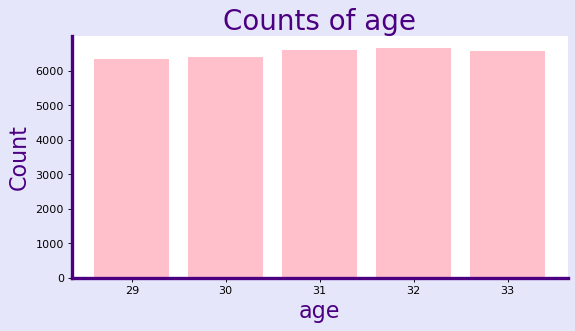

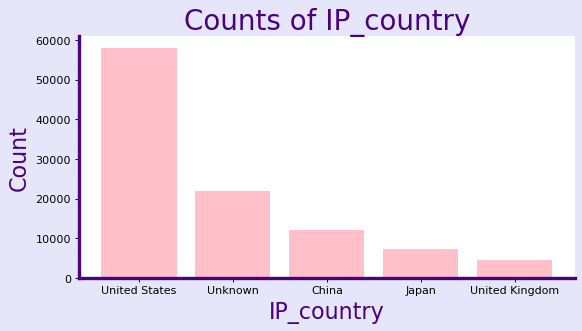

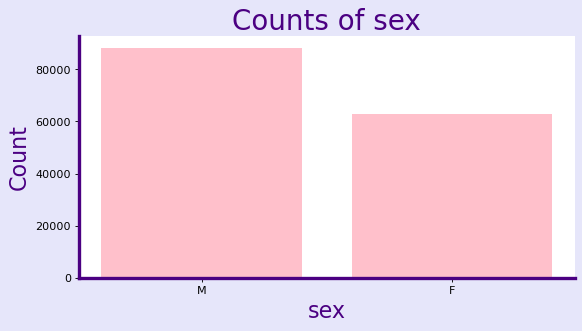

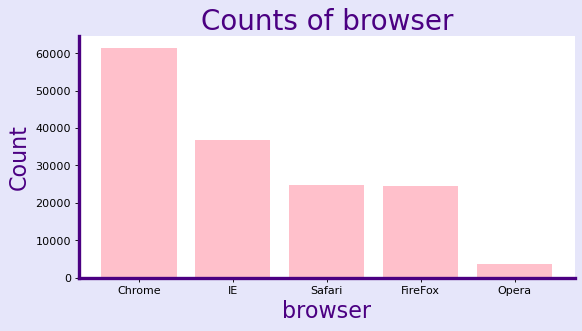

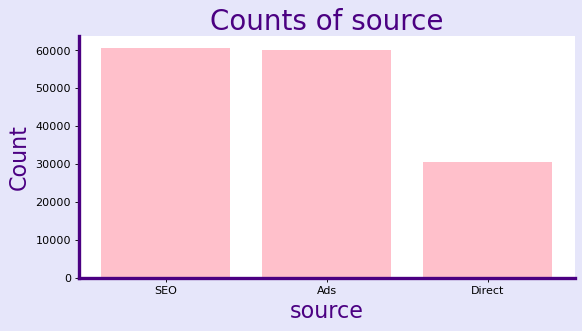

In [22]:
for i in vars:
    np.random.seed(196808012)

    x = df[i].value_counts()[:5] #choosing top 5  by count

    labels = [] # titles names 
    for row in x.index:
        labels.append(row)

    fig, ax = plt.subplots(figsize=(8,4),dpi=80,facecolor="lavender")
    ax.bar(labels, x, color = 'pink');

    ax.set_title(f'Counts of {i}',fontsize = 25, color = 'indigo')# Add a title to the axes.
    ax.set_ylabel('Count',color ='indigo',size = "20") # Add a y-label to the axes.
    ax.set_xlabel(f'{i}',color ='indigo',size = "20") # Add a x-label to the axes.

    # colering and linewidths of x and y axes 

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("indigo")
    for axi in ['top','right']:  
        ax.spines[axi].set_color(None)
    

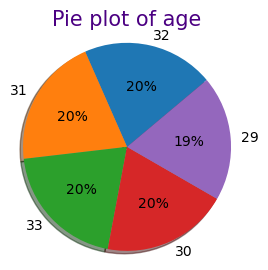

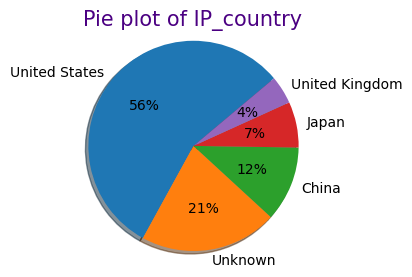

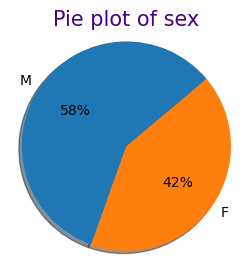

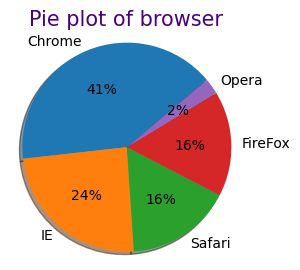

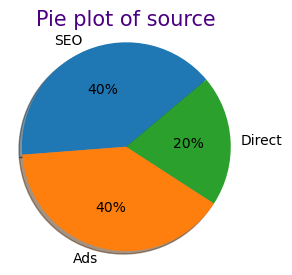

In [23]:
for i in vars:
    x = df[i].value_counts()[:5] #choosing top 5 by count

    labels = [] # titles names 
    for row in x.index:
        labels.append(row)
    
    # Pie chart

    fig, ax = plt.subplots(figsize = (3,3),dpi=100)

    ax.pie(x, labels=labels,autopct='%1.0f%%',shadow=True, startangle=40,radius=1)

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Pie plot of {i}', color = 'indigo',fontsize = 15)
    ;

The most popular<br>
**age** is 32<br>
**country** is United States<br>
**sex** is Male<br>
**browser** is Chrome<br>
**source** is SEO<br>

### 2.In which months fraud purchases are most likely to happen? Use a bar chart.

In [84]:
df['purchase_time'] = pd.to_datetime(df['purchase_time']).dt.date # Changing type of 'purchase_time' to datatime
df['signup_time'] = pd.to_datetime(df['signup_time']).dt.date
month = pd.DatetimeIndex(df['purchase_time']).month #Getting month from 'purchase_time'

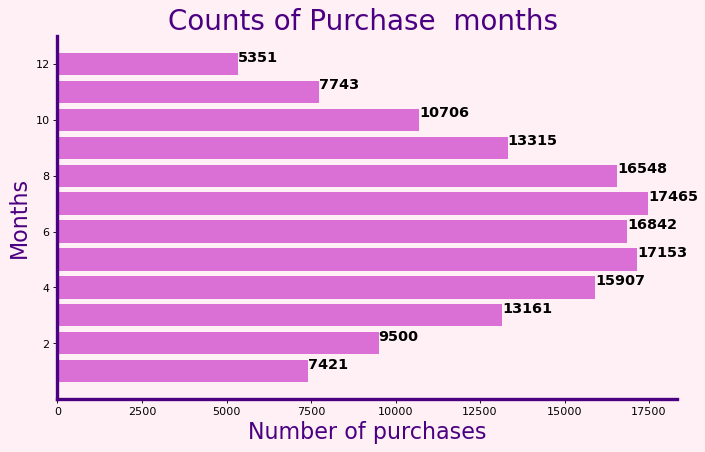

In [171]:
np.random.seed(196808012)

x = month.value_counts() # count purchases by month

labels = []
for row in x.index:
    labels.append(row)

fig, ax = plt.subplots(figsize=(10,6),dpi=80,facecolor='lavenderblush')
ax.set_facecolor('lavenderblush')
ax.barh(labels, x, color = 'orchid')

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='black')

ax.set_title('Counts of Purchase  months ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Months',color ='indigo',size = "20")
ax.set_xlabel('Number of purchases',color ='indigo',size = "20") 


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

Fraud purchases are most likely to happen in **July (07)**.

### 3.In which weekdays fraud purchases are most likely to happen? Use a bar chart.

In [26]:
weekdays = pd.DatetimeIndex(df['purchase_time']).weekday #Getting weekdays from 'purchase_time'

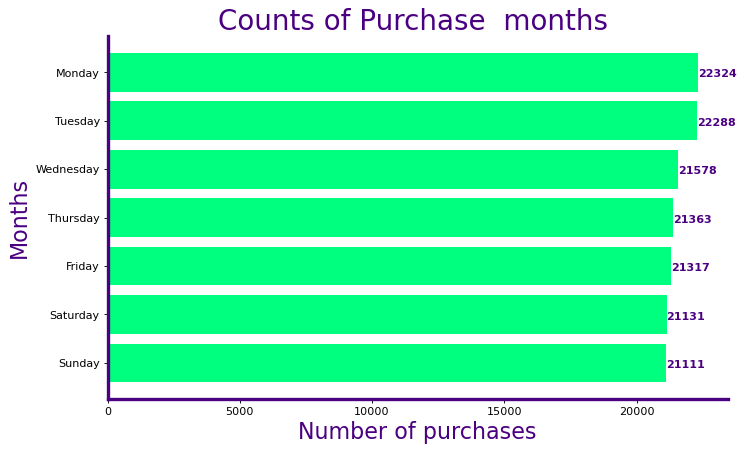

In [168]:
np.random.seed(196808012)

x = weekdays.value_counts() # count purchases by month

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(labels, x, color = 'springgreen');

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='indigo')

ax.set_title('Counts of Purchase  months ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Months',color ='indigo',size = "20")
ax.set_xlabel('Number of purchases',color ='indigo',size = "20") 

ax.set_yticks(labels)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)
    


Fraud purchases are most likely to happen in **Monday**

### 4.Are there cases when a user/device did more than one fraud purchase in a given time range? Use text to present your results.

In [31]:
is_fraud =  df['device_id'][df['class'] == 1] # Choosing device_id-s where class is fraud

In [38]:
# We use value_counts() to count number of purchases for each unique id
# And we choose id-s for which purchase number greater than 1
print(f'There are {sum(is_fraud.value_counts() > 1)} cases when a user/device did more than one fraud purchase in a given time range')

There are 1044 cases when a user/device did more than one fraud purchase in a given time range


### 5.Find fraud and normal purchase distribution over time in a given time period and averaged in a given time period. Use line and bar, pie charts.

In [40]:
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,IP_country
0,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan
1,2015-07-06,2015-08-06,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States
2,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States
3,2015-04-28,2015-04-05,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,United States
4,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States


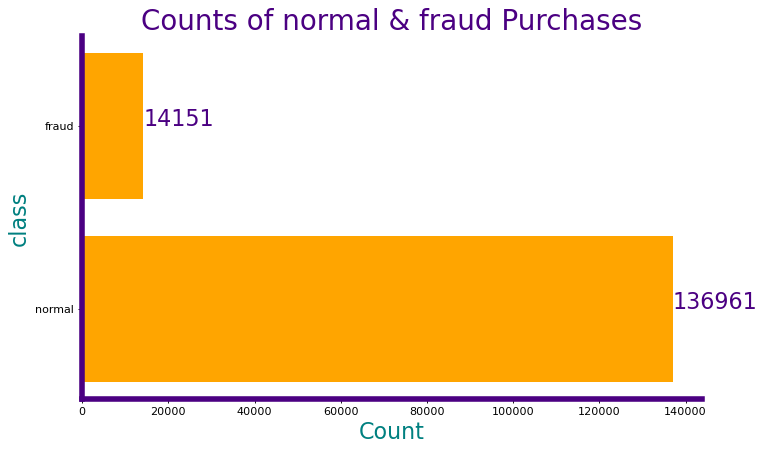

In [111]:
np.random.seed(196808012)

x = df['class'].value_counts()

labels = ['normal','fraud'] 

fig, ax = plt.subplots(figsize=(10,6),dpi=80)
x.barh(labels, x, color = 'orange')

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.4,
             str(round((i.get_width()), 2)),
             fontsize = 20,
             color ='indigo')

ax.set_title('Counts of normal & fraud Purchases',fontsize = 25, color = 'indigo')
ax.set_ylabel('class',color ='teal',size = "20") 
ax.set_xlabel('Count',color ='teal',size = "20") 

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(5)
    ax.spines[axis].set_color("indigo")
for axi in ['right','top']:  
    ax.spines[axi].set_color(None)

### 6.How many users did at least one normal purchase before a fraud purchase. Use text to present your results.

In [114]:
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,IP_country
0,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan
1,2015-07-06,2015-08-06,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States
2,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States
3,2015-04-28,2015-04-05,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,United States
4,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States


In [139]:
df1 = df [['device_id','purchase_time','class']]

In [140]:
is_fraud =  df1.loc[df['class'] == 1]
is_normal = df1.loc[df['class'] == 0] 

In [141]:
first_normal = is_normal.groupby('device_id')["purchase_time"].min()
first_fraud = is_fraud.groupby('device_id')["purchase_time"].min()

In [153]:
df2 = pd.merge(first_normal, first_fraud, left_on='device_id', right_index=True)
df2.count()

purchase_time_x    2685
purchase_time_y    2685
dtype: int64

In [155]:
at_least_one = df2.loc[df2['purchase_time_x'] < df2['purchase_time_y']]
at_least_one.count()

purchase_time_x    1468
purchase_time_y    1468
dtype: int64

### 7.Is there a correlation between purchase value and class? Use scatter plot and colors.

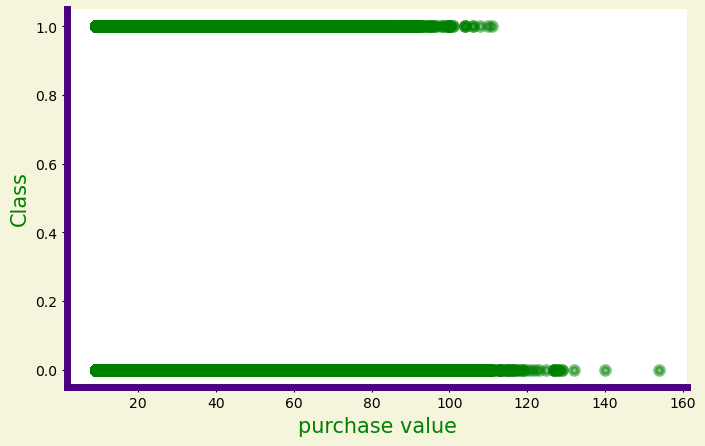

In [158]:
fig, ax = plt.subplots(figsize = (8,5),dpi=100,facecolor="beige")

ax.scatter(x=df['purchase_value'],y=df['class'],color='green',
                linewidths=3,marker = 'o',alpha=0.5)

ax.set_title('',fontsize = 25, color = 'green', backgroundcolor = 'honeydew')
ax.set_ylabel('Class',color ='green',size = "15") 
ax.set_xlabel('purchase value',color ='Green',size = "15") 

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(5)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

For **class 0** (normal purchase) we have higher purchase values than for **class 1** (fraud purchase).

### 8.What is the average time between sign up time and purchase time? Use histograms, box plots

In [55]:
diff = df['purchase_time']-df['signup_time'] # time between sign up time and purchase time
diff = diff.dt.days #convert diff to int in order to plot histogram

''

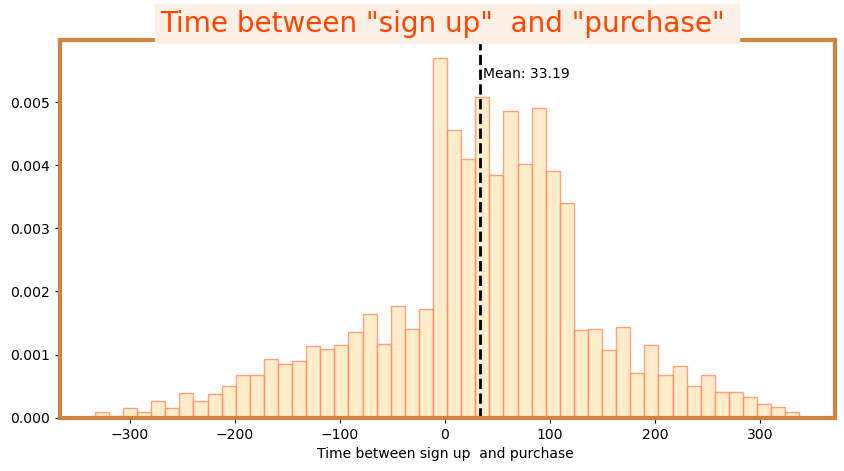

In [124]:
fig, ax = plt.subplots(figsize=(10, 5),dpi=100)

# Histogram of diff
n, bins, patches = ax.hist(diff, 50,density = 1,color = 'moccasin',edgecolor='coral',alpha = 0.7)

# Adding mean line to histogram
ax.axvline(diff.mean(), color='black', linestyle='dashed', linewidth=2)

# Adding mean value to histogram
min_ylim, max_ylim = plt.ylim()
ax.text(diff.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(diff.mean()))

ax.set_xlabel('Time between sign up  and purchase ')
ax.set_title('Time between "sign up"  and "purchase" ',fontsize = 20, color = 'orangered', backgroundcolor = 'linen')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("peru")

;

''

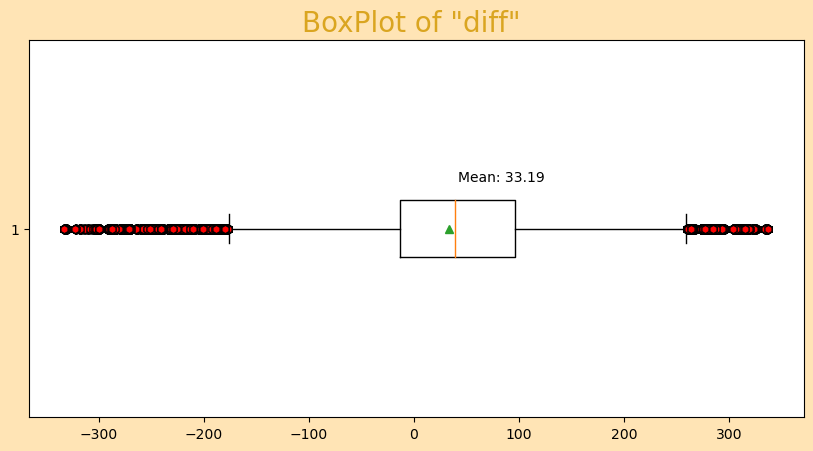

In [113]:
fig, ax = plt.subplots(figsize=(10, 5),dpi=100,facecolor='moccasin')

c = dict(markerfacecolor='red', marker='h')
ax.boxplot(diff,flierprops=c,showmeans=True,vert=False)

min_ylim, max_ylim = plt.ylim()
ax.text(diff.mean()*1.25, max_ylim*0.75, 'Mean: {:.2f}'.format(diff.mean()))

ax.set_title('BoxPlot of "diff" ',fontsize = 20, color = 'goldenrod')
;

From above histogram and boxplot we see that the **average time** between **sign up** time and **purchase time** is
approximately **33** days.

### 9.Is there a correlation between purchase_value and age? Use scatter plot.

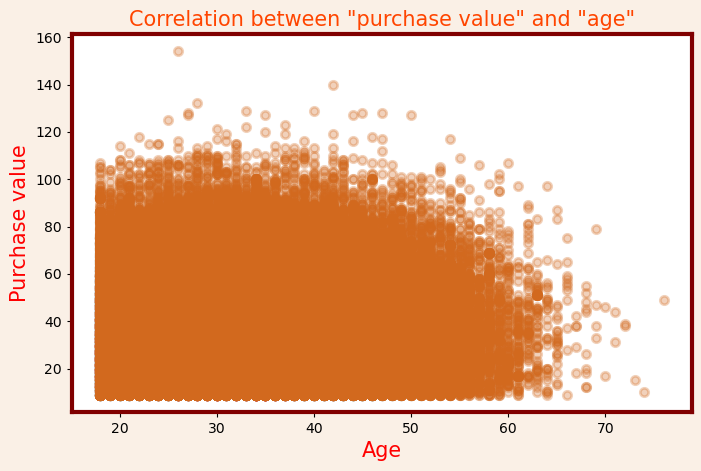

In [157]:
fig, ax = plt.subplots(figsize = (8,5),dpi=100,facecolor="linen")

ax.scatter(x=df['age'],y=df['purchase_value'],color='chocolate',
                linewidths=2,marker = 'o',alpha=0.3)

ax.set_title('Correlation between "purchase value" and "age"',fontsize = 15, color = 'orangered')
ax.set_ylabel('Purchase value',color ='red',size = "15") 
ax.set_xlabel('Age',color ='red',size = "15") 

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("maroon")


From above scatter plot we can say that there is **no strong connection** between **age** and **purchase_value**,but we can notice that older people purchase values are low.